# Taller 2

Estudiante: Santiago Segura
Código: 201617653


En este Notebook se encuentra la solución del taller 2 de ciencia de datos aplicada. 

In [48]:
#Importar librerias
import pandas as pd
import matplotlib.pyplot as plt
import math
plt.style.use("seaborn-deep")
import seaborn as sns
from datetime import datetime,timedelta

# Limpieza y preparación de datos

Búsqueda y corrección de valores atípicos, valores faltantes y duplicados. Debido a que la
base de datos no es muy grande, deberá abstenerse de eliminar registros. Así mismo,
busque la oportunidad de generar nuevas variables con base en la información
suministrada

Leyendo los datos

In [3]:
file_data=pd.read_csv('Data_Taller_2.csv',sep=';',index_col='instant',decimal=',')

In [4]:
file_data

,Date,Season,Holiday,Weather,Temp,Feel_Temp,Hum,Wind,Casual,Registered,cnt
instant,,,,,,,,,,,
1,1/01/2020,Springer,No,Mist + Cloudy,8.175849,9.090375,0.805833,10.749882,331,654,985
2,2/01/2020,Springer,No,Mist + Cloudy,9.083466,8.625733,0.696087,-16.652113,131,670,801
3,3/01/2020,Springer,No,Few clouds,1.229108,0.902035,0.437273,16.636703,120,1229,1349
4,4/01/2020,Springer,No,Few clouds,1.400000,1.969734,0.590435,10.739832,108,1454,1562
5,5/01/2020,Springer,No,Partly cloudy,2.666979,2.775690,0.436957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...
727,27/12/2021,Springer,No,Mist + Cloudy,3.945849,2.652174,0.652917,23.458911,247,1867,2114
728,28/12/2021,Springer,No,Mist + Few clouds,3.906651,3.987162,0.590000,10.416557,644,2451,3095
729,29/12/2021,Springer,No,Mist,3.906651,3.392800,0.752917,8.333661,159,1182,1341


Se revisa el tipo de dato con el que fue leída la columna. 

In [5]:
print(file_data.dtypes)

Date           object
Season         object
Holiday        object
Weather        object
Temp          float64
Feel_Temp     float64
Hum           float64
Wind          float64
Casual          int64
Registered      int64
cnt             int64
dtype: object


Se lleva a cabo una revisión de cada una de las variables, para ver los valores que contiene cada una. 

In [6]:
file_data['Date'].unique()

array(['1/01/2020', '2/01/2020', '3/01/2020', '4/01/2020', '5/01/2020',
       '6/01/2020', '7/01/2020', '8/01/2020', '9/01/2020', '10/01/2020',
       '11/01/2020', '12/01/2020', '13/01/2020', '14/01/2020',
       '15/01/2020', '16/01/2020', '17/01/2020', '18/01/2020',
       '19/01/2020', '20/01/2020', '21/01/2020', '22/01/2020',
       '23/01/2020', '24/01/2020', '25/01/2020', '26/01/2020',
       '27/01/2020', '28/01/2020', '29/01/2020', '30/01/2020',
       '31/01/2020', '1/02/2020', '2/02/2020', '3/02/2020', '4/02/2020',
       '5/02/2020', '6/02/2020', '7/02/2020', '8/02/2020', '9/02/2020',
       '10/02/2020', '11/02/2020', '12/02/2020', '13/02/2020',
       '14/02/2020', '15/02/2020', '16/02/2020', '17/02/2020',
       '18/02/2020', '19/02/2020', '20/02/2020', '21/02/2020',
       '22/02/2020', '23/02/2020', '24/02/2020', '25/02/2020',
       '26/02/2020', '27/02/2020', '28/02/2020', '1/03/2020', '2/03/2020',
       '3/03/2020', '4/03/2020', '5/03/2020', '6/03/2020', '7/03/202

In [7]:
file_data['Season'].value_counts()

Fall        188
Summer      184
Springer    181
Winter      178
Name: Season, dtype: int64

In [8]:
file_data['Holiday'].value_counts()

No     710
Yes     21
Name: Holiday, dtype: int64

In [9]:
file_data['Weather'].value_counts()

 Partly    cloudy                128
Few clouds                       118
Clear                            111
 Partly cloudy                   106
Mist + Broken clouds              69
Mist + Cloudy                     66
Mist + Few clouds                 58
Mist                              54
Light Rain + Scattered clouds      8
Rain + Thunderstorm                7
Snow                               6
Name: Weather, dtype: int64

Para el caso de la columna Weather, hay dos valores que hacen referencia a partly cloud. Se procede a modificarlo, para que quede solo un string 

In [10]:
file_data.loc[((file_data['Weather']== ' Partly cloudy') | (file_data['Weather'] == ' Partly    cloudy')),'Weather']='Partly cloudy'
file_data['Weather'].value_counts()

Partly cloudy                    234
Few clouds                       118
Clear                            111
Mist + Broken clouds              69
Mist + Cloudy                     66
Mist + Few clouds                 58
Mist                              54
Light Rain + Scattered clouds      8
Rain + Thunderstorm                7
Snow                               6
Name: Weather, dtype: int64

In [11]:
file_data['Temp'].unique()

array([ 8.175849 ,  9.083466 ,  1.229108 ,  1.4      ,  2.666979 ,
        1.604356 ,  1.236534 , -0.245    , -1.498349 , -0.910849 ,
       -0.052723 ,  0.118169 , -0.43911  ,  2.966651 ,  2.888349 ,
        0.264151 ,  2.183349 ,  5.732178 ,  4.298349 ,  0.3425   ,
       -5.2208712, -3.4634801, -3.4226089,  2.503466 ,  2.2225   ,
        1.165    ,  1.563466 ,  2.176534 ,  0.499151 ,  1.032178 ,
        4.22     ,  0.786979 ,  1.931288 ,  5.434151 ,  4.768349 ,
        2.379151 , -1.665199 , -1.215644 ,  0.887277 ,  2.4575   ,
        6.876534 , 11.505    ,  4.506089 ,  6.958267 , 12.484151 ,
       16.518349 , 10.760849 ,  5.405199 ,  6.256651 ,  0.564434 ,
        2.421733 ,  5.895644 ,  9.124356 ,  5.2775   ,  8.143466 ,
       11.141831 ,  4.533349 ,  7.745    ,  1.321651 , 10.055849 ,
        9.696534 ,  4.301733 ,  5.7475   ,  5.904151 , 10.287277 ,
        7.470849 , 10.064356 ,  7.285199 ,  6.917377 ,  9.165199 ,
       17.38     , 14.2075   ,  7.6275   , 12.230445 , 12.7583

In [12]:
file_data['Feel_Temp'].unique()

array([ 9.090375 ,  8.625733 ,  0.902035 ,  1.969734 ,  2.77569  ,
        2.960823 ,  1.815433 , -0.374062 , -2.539775 , -0.908264 ,
        0.998808 , -0.457769 , -0.908499 ,  0.855411 ,  3.661264 ,
        3.008199 ,  0.308237 ,  2.919651 ,  6.025834 ,  3.98735  ,
       -0.581849 , -4.2837288, -3.3545623, -2.45729  ,  3.022722 ,
        1.5692   ,  2.3259   ,  2.495899 ,  1.969922 ,  3.765134 ,
        0.75375  ,  3.02291  ,  3.957599 ,  0.360266 ,  2.743589 ,
        3.423726 ,  5.708537 ,  6.271926 ,  1.317562 , -1.218699 ,
       -0.971244 ,  2.034923 ,  2.948838 ,  7.233311 , 10.72245  ,
        3.950878 ,  6.8614   , 12.146926 , 16.063201 , 10.395988 ,
        5.03451  ,  5.351525 ,  0.743551 ,  3.548699 ,  5.591977 ,
        8.471667 ,  5.263024 ,  8.502123 , 10.805546 ,  4.402313 ,
        7.043337 ,  1.406251 ,  4.016913 ,  9.802613 ,  9.213844 ,
        3.207667 ,  6.2128   ,  5.470576 , 10.126396 ,  6.335    ,
        7.31025  ,  9.864277 ,  7.604    ,  6.954366 ,  9.2457

In [13]:
file_data['Hum'].unique()

array([ 0.805833,  0.696087,  0.437273,  0.590435,  0.436957,  0.518261,
        0.498696,  0.535833,  0.434167,  0.482917,  0.686364,  0.599545,
        0.470417,  0.537826,  0.49875 ,  0.48375 ,  0.5375  ,  0.861667,
        0.741739,  0.538333,  0.457083,  0.4     ,  0.436522,  0.491739,
        0.616957,  0.8625  ,  0.6875  ,  0.793043,  0.651739,  0.722174,
        0.60375 ,  0.829565,  0.775417,  0.437826,  0.585217,  0.929167,
        0.568333,  0.738333,  0.537917,  0.494783,  0.437391,  0.506364,
        0.544167,  0.457391,  0.375833,  0.314348,  0.423478,  0.505   ,
        0.516667,  0.187917,  0.407826,  0.605   ,  0.577778,  0.423043,
        0.697391,  0.712174,  0.68    ,  0.876364,  0.535   ,  0.449583,
        0.318333,  0.610417,  0.789167,  0.948261,  0.551304,  0.420833,
        0.      ,  0.649565,  0.594583,  0.527391,  0.496957,  0.655652,
        0.776522,  0.602917,  0.525217,  0.379167,  0.47375 ,  0.737391,
        0.624583,  0.839565,  0.495   ,  0.394167, 

In [14]:
file_data['Wind'].unique()

array([ 10.749882 , -16.652113 ,  16.636703 ,  10.739832 ,  12.5223   ,
         6.0008684,  11.304642 ,  17.875868 ,  24.25065  ,  14.958889 ,
         8.182844 ,  20.410009 ,  20.167    ,   8.478716 ,  10.583521 ,
        12.625011 ,  12.999139 ,   9.833925 ,  13.957239 ,  13.125568 ,
        23.667214 ,  11.52199  ,  16.5222   ,  10.60811  ,   8.696332 ,
        19.68795  ,   7.627079 ,   8.2611   ,   9.739455 ,   4.9568342,
        12.541864 ,   3.565271 ,  17.708636 ,  18.609384 ,   8.565213 ,
        10.792293 ,   9.5006   ,   3.0423561,  12.652213 ,  14.869645 ,
         7.27285  ,  13.625589 ,  17.479161 ,  27.999836 ,  19.522058 ,
        16.869997 ,  15.416968 ,  17.749975 ,  34.000021 ,  14.956745 ,
        20.625682 ,  13.110761 ,   6.305571 ,  16.783232 ,  23.218113 ,
        12.500257 ,   8.391616 ,  19.408962 ,  14.500475 ,  20.624811 ,
        15.125518 ,  13.624182 ,  16.875357 ,  23.000229 ,  22.870584 ,
         8.08355  ,  14.75005  ,  17.545759 ,  15.60899  ,  14.7

In [15]:
file_data['Casual'].unique()

array([ 331,  131,  120,  108,   82,   88,  148,   68,   54,   41,   43,
         25,   38,  222,  251,  117,    9,   78,   83,   75,   93,  150,
         86,  186,   34,   15,  123,  140,   42,   47,   72,   61,  100,
        354,   64,   53,  149,  288,  397,  208,  218,  259,  579,  532,
        639,  195,   74,  139,  424,  694,   81,  137,  231,  214,  640,
        114,  244,  316,  191,   46,  247,  724,  982,  359,  289,  321,
        884, 1424, 1047,  401,  460,  203,  166,  300,  981,  472,  317,
        168,  179,  307,  898, 1651,  734,  167,  413,  571,  172,  879,
       1188,  855,  257,  209,  529,  642,  121, 1558,  669,  409,  613,
        745,  177, 1462, 1710,  773,  678,  547,  569,  878, 1965, 1138,
        847,  603,  255,  614,  894, 1612, 1401,  664,  550,  695,  692,
        902, 1582,  536,  735,  909, 2258, 1576,  836,  659,  740,  758,
        871, 2001, 2355, 1549,  673,  513,  736, 1869, 1685,  763,  676,
        563,  815, 1729, 1467,  863,  727,  769,  5

In [16]:
file_data['Registered'].unique()

array([ 654,  670, 1229, 1454, 1518, 1362,  891,  768, 1280, 1220, 1137,
       1368, 1367, 1026,  953,  883,  674, 1572, 1844, 1468,  888,  836,
       1330, 1799,  472,  416, 1129,  975,  956, 1459, 1313, 1489, 1620,
        905, 1269, 1592, 1466, 1552, 1491, 1597, 1184, 1192, 1705, 1675,
       1897, 2216, 2348, 1103, 1173,  912, 1376, 1778, 1707, 1341, 1545,
       1708, 1365, 1714, 1903, 1562, 1730, 1437,  491, 1628, 1817, 1700,
        577, 1408, 1435, 1687, 1767, 1871, 2320, 2355, 1693, 1424, 1676,
       2243, 1918, 1699, 1910, 1515, 1221, 1806, 2108, 1506, 1920, 1354,
       1598, 2381, 2395, 2570, 1299, 1576, 2493, 1777, 1953, 2738, 2484,
       2186, 2760, 2795, 3331, 3444, 2574, 2481, 3300, 3722, 3325, 3489,
       3717, 3347, 2213, 3554, 3848, 2378, 3819, 3714, 3102, 2932, 3698,
       4109, 3632, 4169, 3413, 2507, 2971, 3185, 3445, 3319, 3840, 4008,
       3547, 3084, 3438, 3833, 4238, 3919, 3808, 2757, 2433, 2549, 3309,
       3461, 4232, 4414, 3473, 3221, 3875, 4070, 37

In [17]:
file_data['cnt'].unique()

array([ 985,  801, 1349, 1562, 1600, 1606, 1510,  959,  822, 1321, 1263,
       1162, 1406, 1421, 1248, 1204, 1000,  683, 1650, 1927, 1543,  981,
        986, 1416, 1985,  506,  431, 1167, 1098, 1096, 1501, 1360, 1526,
       1550, 1708, 1005, 1623, 1712, 1530, 1605, 1538, 1746, 1472, 1589,
       1913, 1815, 2115, 2475, 2927, 1635, 1812, 1107, 1450, 1917, 1807,
       1461, 1969, 2402, 1446, 1851, 2134, 1685, 1944, 2077,  605, 1872,
       2133, 1891,  623, 1977, 2132, 2417, 2046, 2056, 2192, 2744, 3239,
       3117, 2471, 2703, 2121, 1865, 2210, 2496, 1693, 2028, 2425, 1536,
       2227, 2252, 3249, 3115, 1795, 2808, 3141, 1471, 2455, 2895, 3348,
       2034, 2162, 3267, 3126,  795, 3744, 3429, 3204, 3944, 4189, 1683,
       4036, 4191, 4073, 4400, 3872, 4058, 4595, 5312, 3351, 4401, 4451,
       2633, 4433, 4608, 4714, 4333, 4362, 4803, 4182, 4864, 4105, 3409,
       4553, 3958, 4123, 3855, 4575, 4917, 5805, 4660, 4274, 4492, 4978,
       4677, 4679, 4758, 4788, 4098, 3982, 3974, 49

Revisando la cantidad de nulos o datos vacios para las variables

In [18]:
file_data.isnull().sum()

Date          0
Season        0
Holiday       0
Weather       0
Temp          4
Feel_Temp     0
Hum           0
Wind          0
Casual        0
Registered    0
cnt           0
dtype: int64

Para el caso de la temperatura hay 4 valores faltantes. Se procede a reemplazar el valor de temperatura con el valor promedio de la temperatura del clima al que el dato corresponda. Antes de hacer este remplazo vamos a hacer un análisis para ver si hay outliers de la variable temperatura. 

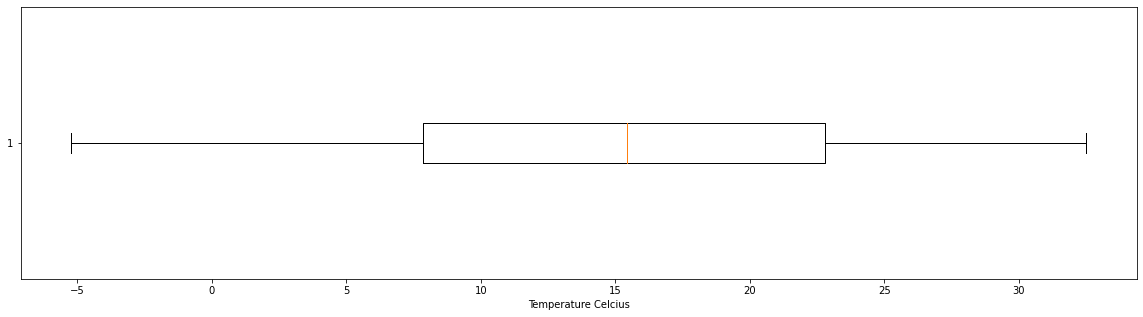

In [19]:
datos_temp=file_data[~file_data['Temp'].isnull()]  #Excluyendo datos que tengan la variable temperatura nula
plt.figure(figsize = (20, 5))
plt.boxplot(datos_temp['Temp'],vert=False)
plt.xlabel('Temperature Celcius')
plt.show()

Del diagrama de cajas de la variable temperatura se puede observar que la variable no tiene outliers y todos los datos se encuentran entre un rango de -5 y 30 grados centígrados.  Debido a esto se procede a revisar los 4 valores faltantes a que clima pertenecen para reemplazar los nulos con el promeido de temperatura correspondiente al clima.

In [20]:
file_data[file_data['Temp'].isnull()]

,Date,Season,Holiday,Weather,Temp,Feel_Temp,Hum,Wind,Casual,Registered,cnt
instant,,,,,,,,,,,
100,10/04/2020,Summer,No,Mist + Few clouds,NaN,12.056639,0.857500,9.833389,1188,1707,2895
230,18/08/2020,Fall,No,Partly cloudy,NaN,23.126126,0.654583,15.624936,639,3166,3805
563,16/07/2021,Fall,No,Clear,NaN,26.033875,0.645000,11.000529,1088,5742,6830
722,22/12/2021,Springer,No,Partly cloudy,NaN,3.097311,10.441250,27.292182,205,1544,1749


Se hallan los promedios temperatura para clima: Mist + Few Clouds, Partly Cloud, Clear

In [21]:
list_wheater= file_data[file_data['Temp'].isnull()]['Weather'].to_list()
dict_prom={}
for i in list_wheater:
  prom=file_data[file_data['Weather']==i]['Temp'].mean()
  dict_prom[i]=prom
print(dict_prom) 

{'Mist + Few clouds': 13.659255719298244, 'Partly cloudy': 15.808145917672414, 'Clear': 16.506460435454546}


Se procede  a reemplazar los nulos para el valor de temperatura

In [22]:
def fill_null_T(x):
  if math.isnan(x['Temp']):
    x['Temp']=dict_prom[x['Weather']]
  return x

In [23]:
file_data=file_data.apply(fill_null_T,axis=1)
file_data[file_data['Temp'].isnull()]

,Date,Season,Holiday,Weather,Temp,Feel_Temp,Hum,Wind,Casual,Registered,cnt
instant,,,,,,,,,,,


Ya no hay datos nulos en el dataset. Se procede a crear nuevas variables


*   Semana, dia, mes, año
*   Promedio de usuarios (cnt) semana pasada


In [44]:
def take_week(x):
  # Function to return number of week according to date
  try:
    week=datetime.strptime(x['Date'],'%d/%m/%Y').strftime("%V")
    day=datetime.strptime(x['Date'],'%d/%m/%Y').strftime("%d")
    month=datetime.strptime(x['Date'],'%d/%m/%Y').strftime("%m")
    year=datetime.strptime(x['Date'],'%d/%m/%Y').strftime("%Y")
    x['Week']=week
    x['Day']=day
    x['Month']=month
    x['Year']=year
  except: 
    fecha=str(int(x['Date'][:2])-1) + x['Date'][2:5] + x['Date'][5:]
    week=(datetime.strptime(fecha,'%d/%m/%Y')-timedelta(days=1)).strftime("%V")
    day=datetime.strptime(fecha,'%d/%m/%Y').strftime("%d")
    month=datetime.strptime(fecha,'%d/%m/%Y').strftime("%m")
    year=datetime.strptime(fecha,'%d/%m/%Y').strftime("%y")
    x['Week']=week
    x['Day']=day
    x['Month']=month 
    x['Year']=year
  return x

In [45]:
file_data=file_data.apply(take_week,axis=1)

In [87]:
file_data['Week'].unique()
def mean_previous_week(x):
  #Funcion que retorna el promedio de usuarios de la semana pasada
  #Para el caso de semana uno, el promedio será el promedio de esa semana  ya que no hay datos anteriores
  if int(x['Week'])>1:
    key_week= '0'+str(x['Week']) if  int(x['Week'])==1 else  x['Week']
    x['mean_prevWeek']=dict_avg_week[key_week]
  else:
    x['mean_prevWeek']=dict_avg_week['01']
  return x

In [88]:
dict_avg_week=file_data.groupby('Week').mean().cnt.to_dict() #Diccionario con promedios de cnt por semana
file_data=file_data.apply(mean_previous_week,axis=1)

De acuerdo a las recomendaciones del meteorólogo se sugiere agrupar por precipitaciones, neblina y otros. Se entiende como precipitación todos los climas que contienen lluvia, nieve (Light Rain + Scattered clouds, Rain + Thunderstorm  , Snow) y  nieblina (Mist + Broken clouds, Mist + Cloudy , Mist + Few clouds , Mist) y los demás (Partly cloudy , Few clouds , Clear). 

In [34]:
def cat_weather(x):
  dict_neb=['Mist + Broken clouds', 'Mist + Cloudy', 'Mist + Few clouds' , 'Mist']
  dict_prep=['Light Rain + Scattered clouds', 'Rain + Thunderstorm'  , 'Snow']
  if x['Weather'] in dict_neb:
    x['cat_weather']=0 #Neblina 
  elif x['Weather'] in dict_prep:
    x['cat_weather']=1 #Precipitacion
  else:
    x['cat_weather']=2 #Otro 
  return x

  

In [35]:
file_data=file_data.apply(cat_weather,axis=1)

# Análisis de datos

Empezaré con un análisis para detectar outliers en las variables númericas

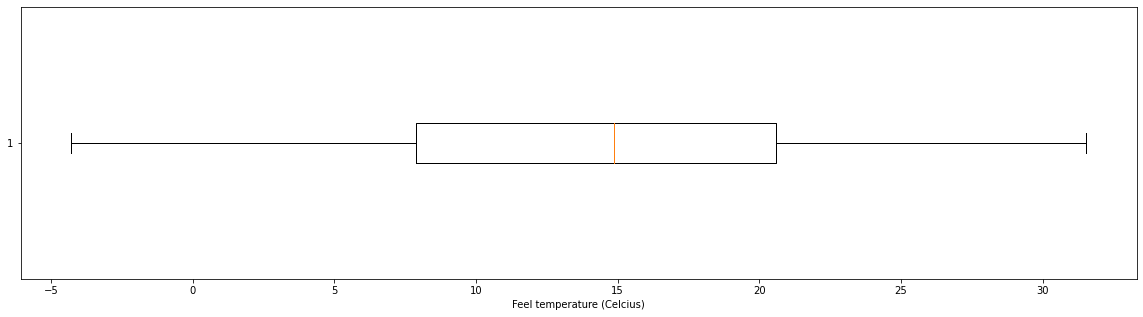

In [28]:
plt.figure(figsize = (20, 5))
plt.boxplot(file_data['Feel_Temp'],vert=False)
plt.xlabel('Feel temperature (Celcius)')
plt.show()

Para el caso de la variable feel temp no hay
outliers

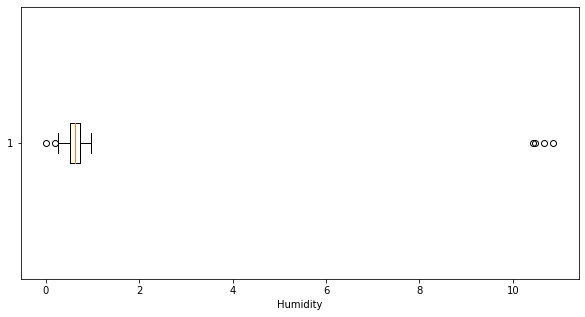

In [29]:
plt.figure(figsize = (10, 5))
plt.boxplot(file_data['Hum'],vert=False)
plt.xlabel('Humidity')
plt.show()

Como se puede ver hay 5 outliers de la variable humidity. Los tres más altos los modificaré al rango más alto dentro de la distribución. 

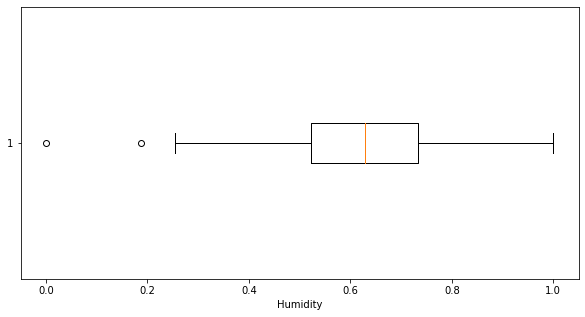

In [30]:
file_data['Hum']=file_data['Hum'].clip(0,1)
plt.figure(figsize = (10, 5))
plt.boxplot(file_data['Hum'],vert=False)
plt.xlabel('Humidity')
plt.show()

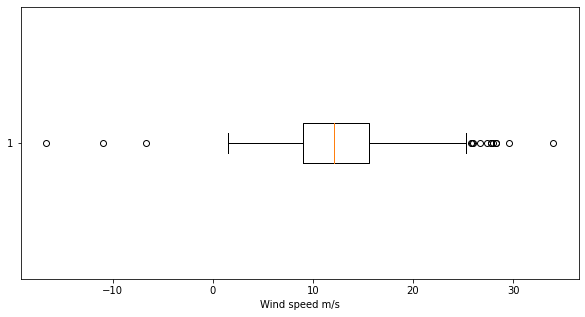

In [31]:
column='Wind'
plt.figure(figsize = (10, 5))
plt.boxplot(datos_temp[column],vert=False)
plt.xlabel('Wind speed m/s')
plt.show()

Para esta distribución hay varios outliers. Unos tienen valores negativos, que no me parece tengan mucho sentido. Lo que haré con valores negativos, será reemplazarlos por los valores absoutos. Los outliers positivos los dejaré así, al usar alguna tecnica de reemplazo podría estar sezgando la distribución. 

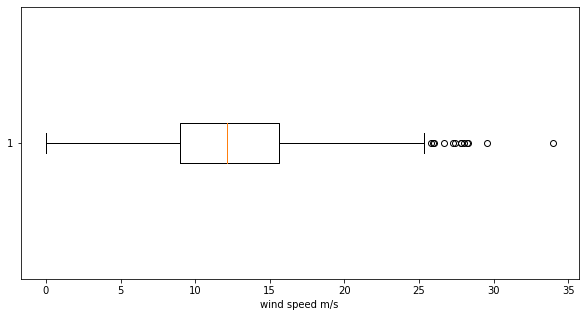

In [47]:
file_data[column]=file_data['Wind'].clip(0,50)
plt.figure(figsize = (10, 5))
plt.boxplot(file_data[column],vert=False)
plt.xlabel('wind speed m/s')
plt.show()

Revisando las variables correspondientes a la cantidad de usuarios

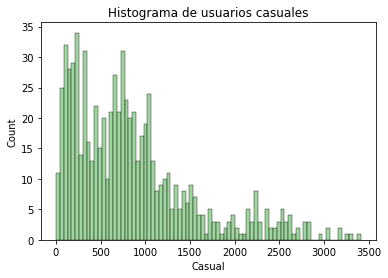

In [64]:
sns.set_palette("Accent")
sns.histplot(file_data['Casual'], bins=80).set(title='Histograma de usuarios casuales')
plt.show()

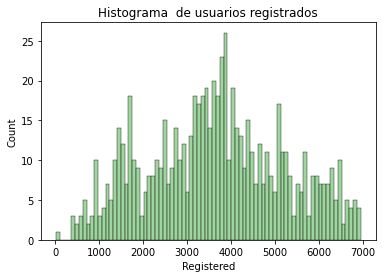

In [65]:
sns.histplot(file_data['Registered'], bins=80).set(title='Histograma  de usuarios registrados')
plt.show()

De estas dos distribuciones se observa que la cantidad de usuarios registrados es mucho mayor a la de usuarios casuales. En registrados se observa una distribución bimodal, mientras que en casuales hay una distribución sezgada a la derecha. 

### Realizando análisis bivariado

Comenzaré revisando las correlaciones de las variables númericas. 

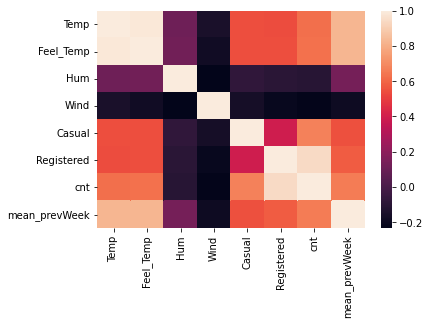

In [93]:
correlation= file_data[['Temp', 'Feel_Temp', 'Hum', 'Wind', 'Casual', 'Registered', 'cnt', 'Day', 'Month','Week', 'mean_prevWeek']].corr()
sns.heatmap(correlation)
plt.show()

Como se puede ver en la matriz de correlaciones solo hay dos variables que tienen una correlación alta Temp y Feel_Temp. Las demás  variables presentar una correlación baja.  Ahora revisando las varibles de clima y tiempo con la cantidad de usuarios que usaron el sistema

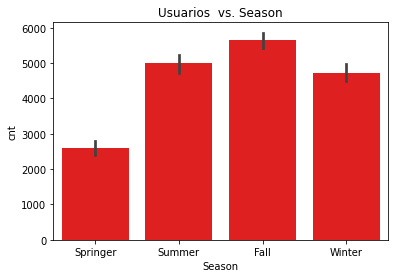

In [100]:
sns.barplot(data=file_data, x='Season', y='cnt', color='Red').set(title='Usuarios  vs Season')
plt.show()

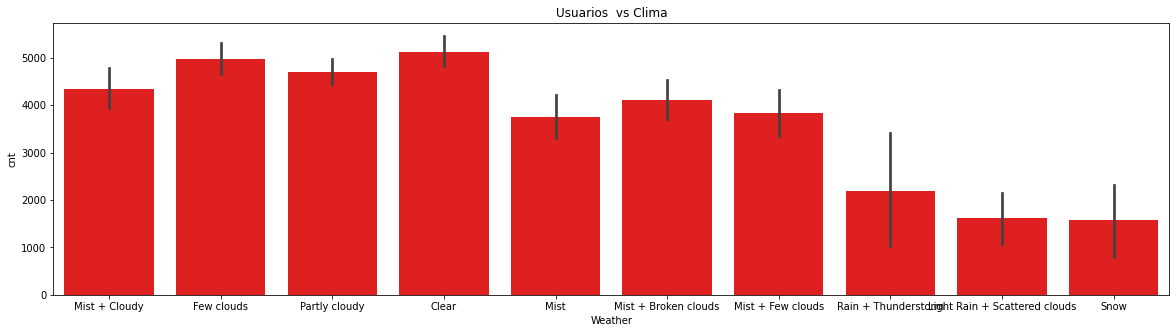

In [103]:
plt.figure(figsize = (20, 5))
sns.barplot(data=file_data, x='Weather', y='cnt', color='Red').set(title='Usuarios  vs Clima')
plt.show()


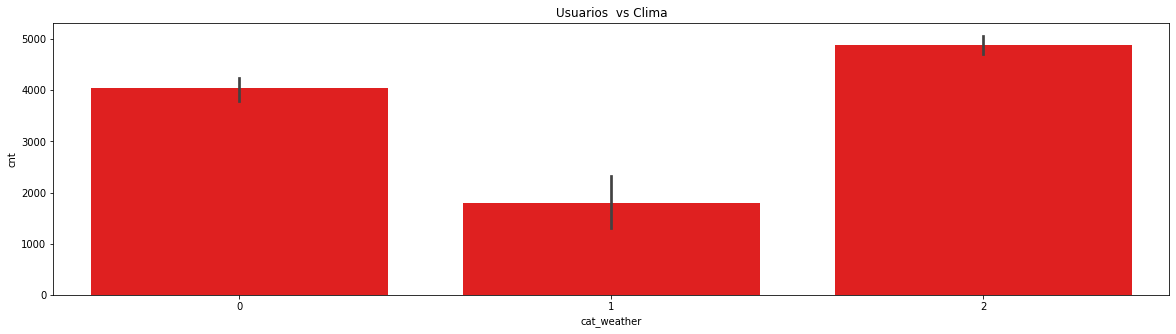

In [105]:
plt.figure(figsize = (20, 5))
sns.barplot(data=file_data, x='cat_weather', y='cnt', color='Red').set(title='Usuarios  vs Clima')
plt.show() #0: Neblina, #2:Otro #1: Precipitaciones


Como se puede ver de las gráficas anteriores, no hay ninguna estación climática donde se observe un número alto de usuarios, que destaque sobre las otras. La única que tiene un número menor de usuarios a las demás es Springer. Para el caso de clima sí se puede obervar cómo los climas en los que más cantidad de usuarios hay son aquellos en los que no hay lluvias ni nieves, o sea ningún tipo de precipitación

# Desarrollo de modelos

In [124]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

Primero convertiremos todas las varibales categoricas con one Hot encoding

In [109]:
data_ml=file_data.copy()
data_ml.head()

,Date,Season,Holiday,Weather,Temp,Feel_Temp,Hum,Wind,Casual,Registered,cnt,Week,mean_prevWeek,cat_weather,Day,Month,Year
instant,,,,,,,,,,,,,,,,,
1,1/01/2020,Springer,No,Mist + Cloudy,8.175849,9.090375,0.805833,10.749882,331,654,985,01,2496.25,0,01,01,2020
2,2/01/2020,Springer,No,Mist + Cloudy,9.083466,8.625733,0.696087,0.000000,131,670,801,01,2496.25,0,02,01,2020
3,3/01/2020,Springer,No,Few clouds,1.229108,0.902035,0.437273,16.636703,120,1229,1349,01,2496.25,2,03,01,2020
4,4/01/2020,Springer,No,Few clouds,1.400000,1.969734,0.590435,10.739832,108,1454,1562,01,2496.25,2,04,01,2020
5,5/01/2020,Springer,No,Partly cloudy,2.666979,2.775690,0.436957,12.522300,82,1518,1600,01,2496.25,2,05,01,2020


In [110]:
data_ml['Holiday'] = data_ml['Holiday'].replace({'Yes': 1, 'No': 0})
season_d = pd.get_dummies(data_ml['Season'], prefix='season_')
data_ml= pd.concat([data_ml, season_d], axis = 1).drop('Season', axis=1)
weather_d = pd.get_dummies(data_ml['Weather'], prefix='weather_')
data_ml = pd.concat([data_ml, weather_d], axis = 1).drop('Weather', axis=1)

No se utilizará la columna fecha, por lo que anteriormente ya se crearon 3 nuevas columnas relacionadas con el valor de la fecha.

In [112]:
data_ml_f=data_ml.drop('Date',axis=1)

In [113]:
data_ml_f.columns

Index(['Holiday', 'Temp', 'Feel_Temp', 'Hum', 'Wind', 'Casual', 'Registered',
       'cnt', 'Week', 'mean_prevWeek', 'cat_weather', 'Day', 'Month', 'Year',
       'season__Fall', 'season__Springer', 'season__Summer', 'season__Winter',
       'weather__Clear', 'weather__Few clouds',
       'weather__Light Rain + Scattered clouds', 'weather__Mist',
       'weather__Mist + Broken clouds', 'weather__Mist + Cloudy',
       'weather__Mist + Few clouds', 'weather__Partly cloudy',
       'weather__Rain + Thunderstorm', 'weather__Snow'],
      dtype='object')

Dividiendo los datos en X y Y. En entrenamiento, test.

In [114]:
Y=data_ml_f[['cnt']]

In [115]:
X=data_ml_f.drop('cnt',axis=1)

In [118]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [119]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Creando los modelos: 1 lineal, otro multipolinomico y otro con regularización

In [141]:
#Modelo lineal sin regularizacion
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
y_predict_train=lin_reg.predict(X_train)
y_predict_test=lin_reg.predict(X_test)
#training
mae_train=mean_absolute_error(Y_train, y_predict_train)
rmse_train=np.sqrt(mean_squared_error(Y_train,y_predict_train))
mae_test=mean_absolute_error(Y_test, y_predict_test)
rmse_test=np.sqrt(mean_squared_error(Y_test,y_predict_test))

print('El MAE para entrenamiento es {}, en test es {} '.format(mae_train,mae_test))

print('El RMS para entrenamiento es {}, en test es {} '.format(rmse_train,rmse_test))
r_score_train=lin_reg.score(X_train,Y_train)
print('Valor R2 de este modelo en test es {}  '.format(r_score_train))
r_score=lin_reg.score(X_test,Y_test)
print('Valor R2 de este modelo en test es {}  '.format(r_score))



El MAE para entrenamiento es 1.4335443030513364e-12, en test es 1.6426587981000846e-12 
El RMS para entrenamiento es 1.9216977778647035e-12, en test es 2.1299841410908425e-12 
Valor R2 de este modelo en test es 1.0  
Valor R2 de este modelo en test es 1.0  


Entrenando modelo polinomico grado 2

In [127]:
from sklearn.preprocessing import PolynomialFeatures

poly_2=PolynomialFeatures(degree=2, include_bias=False)
X_train_2=poly_2.fit_transform(X_train)
X_test_2=poly_2.transform(X_test)
print(X_train_2.shape)

(584, 405)


In [130]:
#Modelo lineal sin regularizacion

lin_reg=LinearRegression()
lin_reg.fit(X_train_2,Y_train)
y_predict_train=lin_reg.predict(X_train_2)
y_predict_test=lin_reg.predict(X_test_2)
#training
mae_train=mean_absolute_error(Y_train, y_predict_train)
rmse_train=np.sqrt(mean_squared_error(Y_train,y_predict_train))
mae_test=mean_absolute_error(Y_test, y_predict_test)
rmse_test=np.sqrt(mean_squared_error(Y_test,y_predict_test))

print('El MAE para entrenamiento es {}, en test es {} '.format(mae_train,mae_test))

print('El RMS para entrenamiento es {}, en test es {} '.format(rmse_train,rmse_test))
r_score_train=lin_reg.score(X_train_2,Y_train)
print('Valor R2 de este modelo en test es {}  '.format(r_score_train))
r_score=lin_reg.score(X_test_2,Y_test)
print('Valor R2 de este modelo en test es {}  '.format(r_score))



El MAE para entrenamiento es 8.265656043938041e-12, en test es 50.187998746763675 
El RMS para entrenamiento es 1.1546221911424456e-11, en test es 289.71292375103604 
Valor R2 de este modelo en test es 1.0  
Valor R2 de este modelo en test es 0.9772879891643995  


Utilizando regularización Ridge 

In [132]:
#variando el valor de alpha para regularizacion ridge 
from sklearn.linear_model import Ridge

alphas=[0.00001,0.001,0.001,0.1]
models_ridge_2=[]
r2_lasso_2=[]
print("Para polinomio grado 2 usando regularización ridge")
for i in alphas:

  model=Ridge(alpha=i,solver='cholesky')
  models_ridge_2.append(model.fit(X_train_2,Y_train))
  y_train_model=model.predict(X_train_2)
  y_test_model=model.predict(X_test_2)
  mae_train=mean_absolute_error(y_train_model, Y_train)
  rmse_train=np.sqrt(mean_squared_error(y_train_model,Y_train))
  mae_test=mean_absolute_error( y_test_model,Y_test)
  rmse_test=np.sqrt(mean_squared_error(y_test_model,Y_test))
  print('Para alpha {}'.format(i))
  print('El MAE para entrenamiento es {}, en test es {} '.format(mae_train,mae_test))
  print('El RMS para entrenamiento es {}, en test es {} '.format(rmse_train,rmse_test))
  r_score_train=model.score(X_train_2,Y_train)
  print('Valor R2 de este modelo en train es {}  '.format(r_score_train))
  r_score=model.score(X_test_2,Y_test)
  r2_lasso_2.append(r_score)
  print('Valor R2 de este modelo en test es {}  '.format(r_score))
  print('\n')

Para polinomio grado 2 usando regularización ridge
Para alpha 1e-05
El MAE para entrenamiento es 0.0010202336847571244, en test es 50.337079561335116 
El RMS para entrenamiento es 0.0013688044431466875, en test es 290.53277306447455 
Valor R2 de este modelo en train es 0.9999999999994963  
Valor R2 de este modelo en test es 0.9771592633007211  


Para alpha 0.001
El MAE para entrenamiento es 0.029987696600567514, en test es 50.32705335330394 
El RMS para entrenamiento es 0.040118393969316074, en test es 290.2318474505113 
Valor R2 de este modelo en train es 0.9999999995672983  
Valor R2 de este modelo en test es 0.9772065543723959  


Para alpha 0.001
El MAE para entrenamiento es 0.029987696600567514, en test es 50.32705335330394 
El RMS para entrenamiento es 0.040118393969316074, en test es 290.2318474505113 
Valor R2 de este modelo en train es 0.9999999995672983  
Valor R2 de este modelo en test es 0.9772065543723959  


Para alpha 0.1
El MAE para entrenamiento es 0.5536425987287967,

# Evaluación de modelo

Para escoger el mejor modelo se tuvo en cuenta el MAE y RMSE de los datos tanto en entrenamiento como prueba. Y el valor de R2 de los valores de cnt predecidos por el modelo entrenado. Para este caso el mejor modelo es el entrenado para grado dos sin regularización. Ya que su RMS y MAE es el valor más bajo para el conjunto de test 289.7 y 50.1 respectivamente. 

# Interpretación

In [144]:
coeficientes = pd.DataFrame()
coeficientes['features'] = X.columns
coeficientes['coef'] = lin_reg.coef_[0]
coeficientes.sort_values(by='coef', ascending=False)


,features,coef
6,Registered,1.549386e+03
5,Casual,6.939460e+02
7,Week,1.252130e-12
15,season__Summer,5.717201e-13
10,Day,4.801439e-13
2,Feel_Temp,2.796992e-13
21,weather__Mist + Broken clouds,1.278977e-13
19,weather__Light Rain + Scattered clouds,1.278977e-13
12,Year,1.101717e-13
8,mean_prevWeek,9.400032e-14


Las variables más importantes son registrados, casuales y semana. 

En un escenario ideal se deberían aumentar el numero de usuarios registrados, ya que es la variable que más ayuda a predecir el numero de usuarios. Además debe ser verano.